<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n250.csv',
 'data_add_delta_-1.2_n120.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.758281,37.994628,42.525656,0.147367,177.425932,177.312731,0.113200
1,0.0,1.0,88.740109,87.620764,44.170535,-0.099377,230.432030,230.513960,-0.081930
2,0.0,2.0,93.829791,45.911467,69.191808,0.022115,218.955180,218.963594,-0.008414
3,0.0,3.0,48.475919,34.301840,58.512880,0.175965,151.466604,151.301464,0.165139
4,0.0,4.0,44.803305,94.481905,68.919603,-0.009343,218.195470,218.148673,0.046796
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.858106,44.302104,86.401044,-0.246307,218.314947,218.532065,-0.217118
19996,999.0,16.0,66.754087,55.153533,22.446626,-0.143980,154.210266,154.327765,-0.117499
19997,999.0,17.0,58.259494,31.531019,40.081086,0.174260,140.045859,139.802804,0.243055
19998,999.0,18.0,62.084504,93.688023,66.031444,0.104318,231.908290,231.871180,0.037110


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.758281  37.994628  42.525656  0.147367  177.425932   
      1.0    88.740109  87.620764  44.170535 -0.099377  230.432030   
      2.0    93.829791  45.911467  69.191808  0.022115  218.955180   
      3.0    48.475919  34.301840  58.512880  0.175965  151.466604   
      4.0    44.803305  94.481905  68.919603 -0.009343  218.195470   
...                ...        ...        ...       ...         ...   
999.0 15.0   77.858106  44.302104  86.401044 -0.246307  218.314947   
      16.0   66.754087  55.153533  22.446626 -0.143980  154.210266   
      17.0   58.259494  31.531019  40.081086  0.174260  140.045859   
      18.0   62.084504  93.688023  66.031444  0.104318  231.908290   
      19.0   27.236187  39.564189  25.076032 -0.182381  101.694027   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    177.312731  0.113200  
      1.0    230.513960 -0.081930  
      2.0    218.963594 -0.008414  
      3.0    151.301464  0.165139  
      4.0    218.148673  0.046796  
...                 ...       ...  
999.0 15.0   218.532065 -0.217118  
      16.0   154.327765 -0.117499  
      17.0   139.802804  0.243055  
      18.0   231.871180  0.037110  
      19.0   101.821788 -0.127761  

[20000 rows x 7 columns]

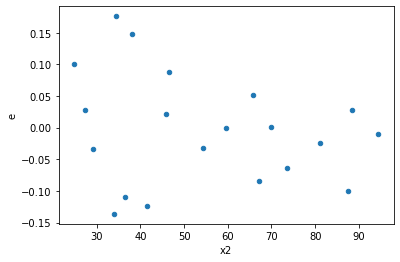

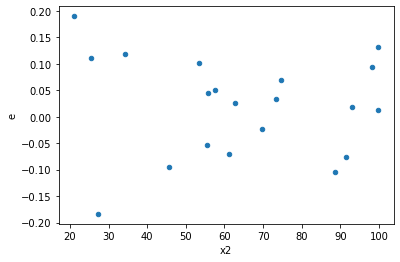

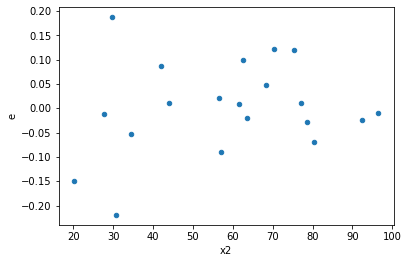

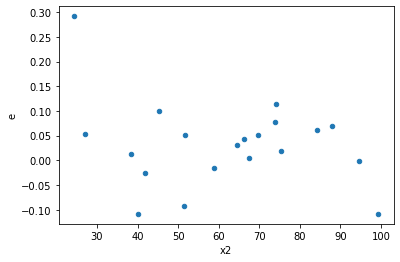

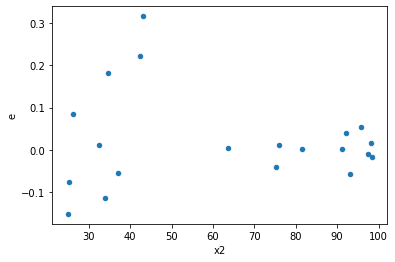

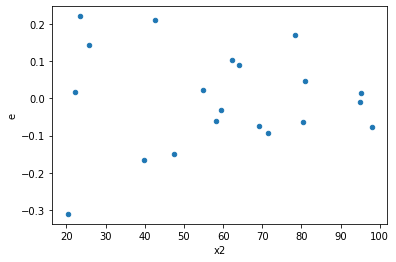

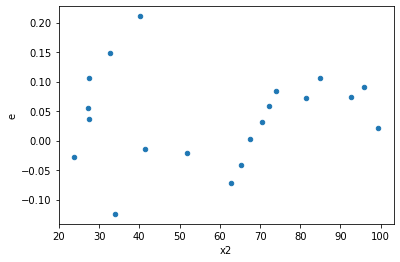

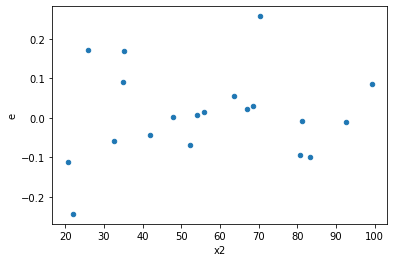

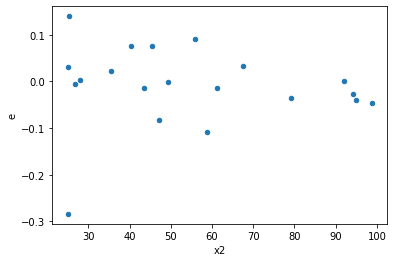

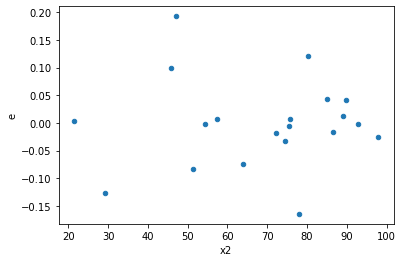

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,5.0,5.0,0.039587030151153106,0.05853706767653658,0.007917406030230622,0.011707413535307316,1.4786930833918968,0.6782235062600881,0.660888246869956,0.33911175313004405,Reject001=1 : Homoscedasticity
16.0,5.0,5.0,0.04595909678834167,0.1032369354223969,0.009191819357668333,0.020647387084479378,2.2462785963318748,0.3952023096213759,0.802398845189312,0.19760115481068796,Reject001=1 : Homoscedasticity
18.0,5.0,5.0,0.033378675909870266,0.08970769085022758,0.006675735181974053,0.017941538170045516,2.687574878418125,0.30182085397085645,0.8490895730145718,0.15091042698542823,Reject001=1 : Homoscedasticity
28.0,5.0,5.0,0.06273523833777461,0.06309830090739119,0.012547047667554923,0.012619660181478237,1.0057872191010384,0.9951018496392803,0.5024490751803599,0.49755092481964014,Reject001=1 : Homoscedasticity
30.0,5.0,5.0,0.011623602898666437,0.012275637996291148,0.002324720579733287,0.0024551275992582295,1.0560957822896306,0.9537007370267521,0.523149631486624,0.47685036851337603,Reject001=1 : Homoscedasticity
31.0,5.0,5.0,0.015961720916280377,0.0490987408440962,0.0031923441832560754,0.00981974816881924,3.0760305296415287,0.24298232073610238,0.8785088396319488,0.12149116036805119,Reject001=1 : Homoscedasticity
33.0,5.0,5.0,0.034209177264200946,0.03547173472567989,0.006841835452840189,0.007094346945135978,1.0369069811801694,0.9692450596127662,0.5153774701936169,0.4846225298063831,Reject001=1 : Homoscedasticity
36.0,5.0,5.0,0.013311475395918938,0.0507916311639964,0.0026622950791837874,0.010158326232799279,3.8156274682796023,0.16797417760417566,0.9160129111979122,0.08398708880208783,Reject001=1 : Homoscedasticity
46.0,5.0,5.0,0.016338315494533677,0.033102044969182905,0.0032676630989067353,0.006620408993836581,2.026037811563737,0.4568878119257471,0.7715560940371264,0.22844390596287356,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.06674460714583971,0.016342475437404528,0.013348921429167942,0.0032684950874809055,0.24485087464363295,0.14867839487124004,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.040148005594148786,0.033622072582118176,0.008029601118829758,0.006724414516423635,0.8374531208847469,0.8504072455203185,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.05390222949243713,0.04711943679586828,0.010780445898487426,0.009423887359173657,0.8741648952104936,0.8862730161743797,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.019378799797281552,0.009663237248918604,0.0038757599594563103,0.001932647449783721,0.49864993446468026,0.4633149066200563,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.14664514391718525,0.00909061538473063,0.02932902878343705,0.0018181230769461262,0.061990565400954316,0.008391210767051932,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,0.039587030151153106,0.05853706767653658,0.007917406030230622,0.011707413535307316,1.4786930833918968,0.6782235062600881,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.026655283314356654,0.006050769891241938,0.0053310566628713306,0.0012101539782483875,0.2270007720376758,0.129416231831504,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.08051488125490036,0.02903662622404443,0.01610297625098007,0.005807325244808886,0.36063676393085636,0.2873453022961293,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,0.04071289695041158,0.005998706716184951,0.008142579390082316,0.0011997413432369903,0.14734168201028272,0.055600861148229624,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      962
Reject001=0 : Heteroscedasticity     38
Name: Result_test, dtype: int64